In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import transpose
from numpy.linalg import inv
plt.style.use('ggplot')
from numpy import genfromtxt
import scipy.spatial.distance as cd
from matplotlib.pyplot import figure

In [3]:
def generate_points(m,n):
    """ function to randomly sample m patterns in {-1,1}^n or {0,1}^n
    OUTPUT: m by n matrix X of patterns and m by 1 vector Y of labels
      """

    #samples for winnow are in {0,1}^n instead. 
    Xwin = np.random.randint(2, size=(m, n))
    Ywin = Xwin[:,[0]]

    X = 2*Xwin - 1
    Y = X[:,[0]]

    return Xwin, Ywin, X,Y

def perceptron(X,Y):
    rows,cols = X.shape
    weight = np.zeros((1,cols))
    for t in range(rows):
        xt = X[[t],:]
        yt = Y[[t],:]
        ypred = np.sign(weight@(xt.T))
        if(yt!=ypred):
          weight = weight + yt*xt
    return weight

def winnow(X,Y):
  rows,cols = X.shape
  weight = np.ones((1,cols))
  for t in range(rows):
      xt = X[[t],:]
      yt = Y[[t],:]
      ypred = (weight@(xt.T))>=cols
      if(yt!=ypred):
        weight = 2.0**((yt - ypred)*xt) * weight
  return weight

def least_squares(X,Y):
  rows, cols = X.shape
  weights = np.linalg.pinv(X)@Y
  return weights


def one_NN(Xtrain, Ytrain,Xtest):
  DISTANCE_MATRIX = cd.cdist(Xtest,Xtrain) #compute distance between training and testing points
  index_closest = np.argmin(DISTANCE_MATRIX, axis=1)
  predictions = Ytrain[index_closest]
  return predictions 


PERCEPTRON

In [4]:
maxN = 100
MAXRUNS = 20
estimated_comp_perceptron = np.zeros((MAXRUNS, maxN))
delta = 0.01
test_samples = 1700
tol = 100*np.sqrt(np.log(1/delta)/(2*test_samples))


for runs in range(MAXRUNS):
    print(runs)
    for n in range(1,maxN+1):
        for m in range(1,2**n + 1):
            Xwin, Ywin, X,Y = generate_points(m,n)
            weight=perceptron(X,Y)

            Xwin_test, Ywin_test, X_test,Y_test = generate_points(test_samples,n)
            emp_err = 100*np.mean(np.sign(weight@(X_test.T)) != Y_test.T)
            if(emp_err<10-tol):
                break
        estimated_comp_perceptron[runs,n-1] = m


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [5]:
#perceptron's estimated sample complexity's average and std over the 20 runs
average_estimated_comp_perceptron = np.mean(estimated_comp_perceptron, axis=0)
std_estimated_comp_perceptron = np.std(estimated_comp_perceptron, axis=0)

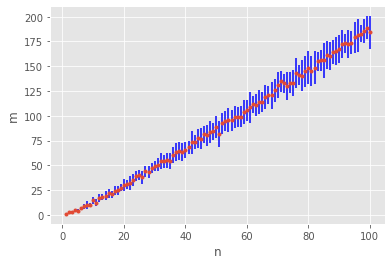

In [6]:
#figure(figsize=(7,7), dpi=100)
plt.errorbar(np.arange((maxN))+1, average_estimated_comp_perceptron, std_estimated_comp_perceptron, linestyle='None', marker='.', ecolor='b')
plt.xlabel('n')
plt.ylabel('m')
plt.savefig('Q3_1.png')
plt.show()

WINNOW

In [7]:
maxN = 100
MAXRUNS = 20
estimated_comp_winnow = np.zeros((MAXRUNS, maxN))
delta = 0.01
test_samples = 1700
tol = 100*np.sqrt(np.log(1/delta)/(2*test_samples))


for runs in range(MAXRUNS):
    print(runs)
    for n in range(1,maxN+1):
        for m in range(1,2**n + 1):
            Xwin, Ywin, X,Y = generate_points(m,n)
            weight = winnow(Xwin,Ywin)

            Xwin_test, Ywin_test, X_test,Y_test = generate_points(test_samples,n)
            emp_err = 100*np.mean(((weight@(Xwin_test.T))>=n) != Ywin_test.T)
            if(emp_err<10-tol):
                break
        estimated_comp_winnow[runs,n-1] = m

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [8]:
#winnow's estimated sample complexity's average and std over the 20 runs
average_estimated_comp_winnow = np.mean(estimated_comp_winnow, axis=0)
std_estimated_comp_winnow = np.std(estimated_comp_winnow, axis=0)

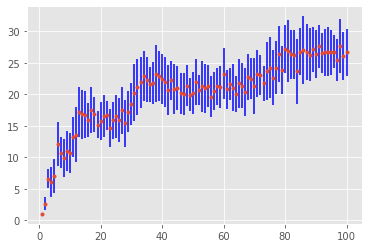

In [9]:
#figure(figsize=(7,7), dpi=100)
plt.errorbar(np.arange((maxN))+1, average_estimated_comp_winnow, std_estimated_comp_winnow, linestyle='None', marker='.', ecolor='b')

plt.savefig('Q3_2.png')
plt.show()

LEAST SQUARES

In [10]:
Xwin, Ywin, X,Y = generate_points(10,5)
weight = least_squares(X,Y)

In [11]:
maxN = 100
MAXRUNS = 20
estimated_comp_LSQ = np.zeros((MAXRUNS, maxN))
delta = 0.01
test_samples = 1700
tol = 100*np.sqrt(np.log(1/delta)/(2*test_samples))


for runs in range(MAXRUNS):
    print(runs)
    for n in range(1,maxN+1):
        for m in range(1,2**n + 1):
            Xwin, Ywin, X,Y = generate_points(m,n)
            weight = least_squares(X,Y)

            Xwin_test, Ywin_test, X_test,Y_test = generate_points(test_samples,n)
            emp_err = 100*np.mean(((np.sign(X_test@weight))!=Y_test))
            if(emp_err<10-tol):
                break
        estimated_comp_LSQ[runs,n-1] = m

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [12]:
#LSQ's estimated sample complexity's average and std over the 20 runs
average_estimated_comp_LSQ = np.mean(estimated_comp_LSQ, axis=0)
std_estimated_comp_LSQ = np.std(estimated_comp_LSQ, axis=0)

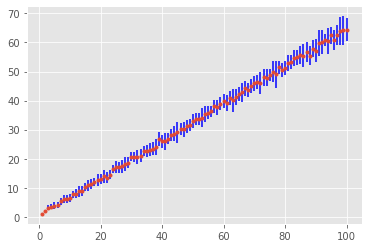

In [13]:
#figure(figsize=(7,7), dpi=100)
plt.errorbar(np.arange((maxN))+1, average_estimated_comp_LSQ, std_estimated_comp_LSQ, linestyle='None', marker='.', ecolor='b')

plt.savefig('Q3_3.png')
plt.show()

1NN

In [14]:
#runs for 14 mins
maxN = 14
MAXRUNS = 20
estimated_comp_oneNN = np.zeros((MAXRUNS, maxN))
delta = 0.01
test_samples = 1000
tol = 100*np.sqrt(np.log(1/delta)/(2*test_samples))


for runs in range(MAXRUNS):
    print(runs)
    for n in range(1,maxN+1):
        m=0
        while(1):
            m=m+1
            Xwin, Ywin, X,Y = generate_points(m,n) #training data
            Xwin_test, Ywin_test, X_test,Y_test = generate_points(test_samples,n) #testing data
            ypred = one_NN(X,Y,X_test)
            emp_err = 100*np.mean((ypred!=Y_test))
            if(emp_err<10-tol):
                break
        estimated_comp_oneNN[runs,n-1] = m

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [15]:
#1nn's estimated sample complexity's average and std over the 20 runs
average_estimated_comp_oneNN = np.mean(estimated_comp_oneNN, axis=0)
std_estimated_comp_oneNN = np.std(estimated_comp_oneNN, axis=0)


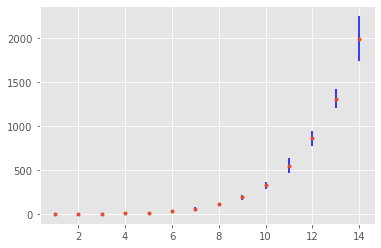

In [16]:
#figure(figsize=(7,7), dpi=100)
plt.errorbar(np.arange((maxN))+1, average_estimated_comp_oneNN, std_estimated_comp_oneNN, linestyle='None', marker='.', ecolor='b')

plt.savefig('Q3_4.png')
plt.show()